In [1]:
from getfem import Mesh, MeshFem, Fem, MeshIm, Integ, Model
from numpy import arange

In [2]:
m = Mesh('cartesian', arange(0,1.1,0.1), arange(0,1.1,0.1))

In [3]:
mf = MeshFem(m, 1)

In [4]:
mf.set_fem(Fem('FEM_QK(2,2)'))

In [5]:
print Fem('FEM_QK(2,2)').poly_str()

('1 - 3*x - 3*y + 2*x^2 + 9*x*y + 2*y^2 - 6*x^2*y - 6*x*y^2 + 4*x^2*y^2', '4*x - 4*x^2 - 12*x*y + 12*x^2*y + 8*x*y^2 - 8*x^2*y^2', '-x + 2*x^2 + 3*x*y - 6*x^2*y - 2*x*y^2 + 4*x^2*y^2', '4*y - 12*x*y - 4*y^2 + 8*x^2*y + 12*x*y^2 - 8*x^2*y^2', '16*x*y - 16*x^2*y - 16*x*y^2 + 16*x^2*y^2', '-4*x*y + 8*x^2*y + 4*x*y^2 - 8*x^2*y^2', '-y + 3*x*y + 2*y^2 - 2*x^2*y - 6*x*y^2 + 4*x^2*y^2', '-4*x*y + 4*x^2*y + 8*x*y^2 - 8*x^2*y^2', 'x*y - 2*x^2*y - 2*x*y^2 + 4*x^2*y^2')


In [6]:
mim = MeshIm(m, Integ('IM_EXACT_PARALLELEPIPED(2)'))

In [7]:
border = m.outer_faces()

In [8]:
m.set_region(42, border)

In [9]:
md = Model('real')

In [10]:
md.add_fem_variable('u', mf)

In [11]:
md.add_Laplacian_brick(mim, 'u');

In [12]:
g = mf.eval('x*(x-1) - y*(y-1)')
md.add_initialized_fem_data('DirichletData', mf, g)
md.add_Dirichlet_condition_with_multipliers(mim, 'u', mf, 42, 'DirichletData')

1

In [13]:
md.solve()

(0, 1)

In [14]:
u = md.variable('u')

In [15]:
mf.export_to_pos('u.pos',u,'Computed solution')

In [16]:
%%writefile gscript
Print "A_step-by-step_basic_example_python_image1.png";
Exit;

Writing gscript


In [17]:
!cat gscript

Print "A_step-by-step_basic_example_python_image1.png";
Exit;

In [18]:
!gmsh u.pos gscript

In [19]:
from IPython.core.display import Image

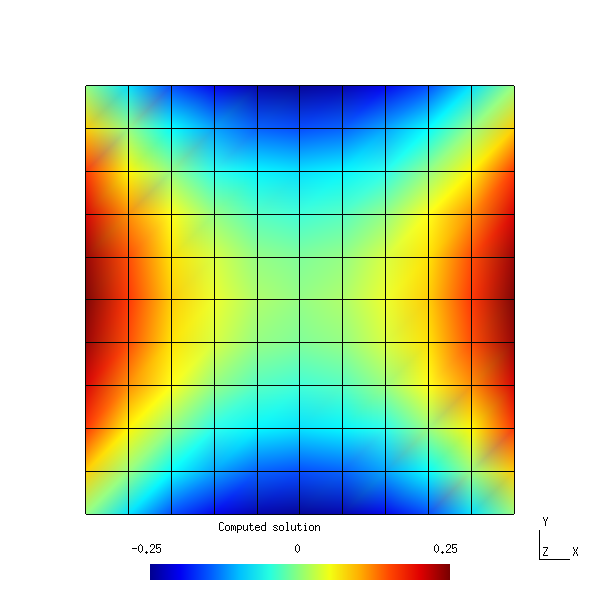

In [20]:
Image('A_step-by-step_basic_example_python_image1.png')

In [21]:
f = mf.eval('5')
md.add_initialized_fem_data('VolumicData', mf, f)
md.add_source_term_brick(mim, 'u', 'VolumicData')

2

In [22]:
md.solve()
u = md.variable('u')
mf.export_to_pos('u.pos',u,'Computed solution')

In [23]:
%%writefile gscript
Print "A_step-by-step_basic_example_python_image2.png";
Exit;

Overwriting gscript


In [24]:
!gmsh u.pos gscript

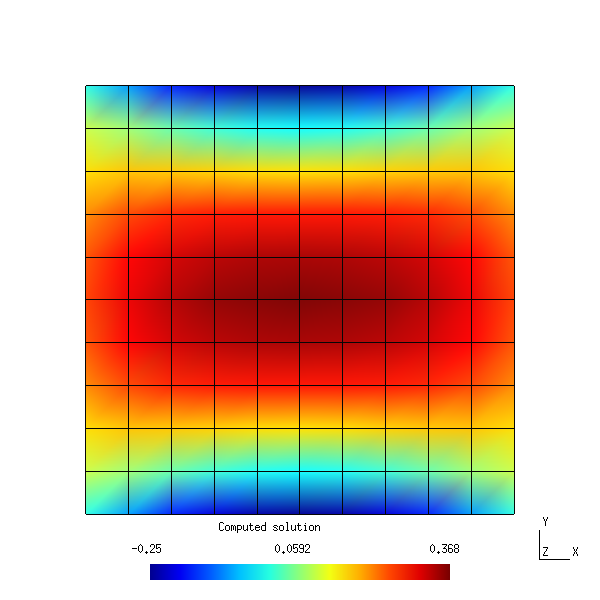

In [25]:
Image('A_step-by-step_basic_example_python_image2.png')